In [272]:
#Técnica de factorización de la matriz no negativa (NMF) 
import os
import numpy as np
import langdetect
from stop_words import get_stop_words
CORPUS_PATH = os.path.join('data', 'output/es')
filenames = sorted([os.path.join(CORPUS_PATH, fn) for fn in os.listdir(CORPUS_PATH)])

In [273]:
# files are located in data/datos
len(filenames)
filenames[:5]

['data\\output/es\\365imagenesbonitas.com.txt',
 'data\\output/es\\4fotos1palabrarespuestas.net.txt',
 'data\\output/es\\abc.gov.ar.txt',
 'data\\output/es\\adnriver.com.txt',
 'data\\output/es\\ahba.com.ar.txt']

In [274]:
#Por analogía con LDA, utilizaremos NMF para obtener una matriz de documentos relacionados con el
#tema (temas aquí también se conocen como "componentes") y una lista de los mejores palabras para cada tema.
#clara analogía con los mismos nombres de variables: doctopicytopic_words
import sklearn.feature_extraction.text as text

#lang = langdetect.detect(CORPUS_PATH)
lang_stop = get_stop_words('es')
vectorizer = text.CountVectorizer(input='filename', stop_words=lang_stop, min_df=20)
dtm = vectorizer.fit_transform(filenames).toarray()
vocab = np.array(vectorizer.get_feature_names())

dtm.shape

(165L, 9L)

In [275]:
from sklearn import decomposition
num_topics = 20
num_top_words = 20
clf = decomposition.NMF(n_components=num_topics, random_state=1)

# this next step may take some time

In [276]:
doctopic = clf.fit_transform(dtm)

In [277]:
# Palabras asociadas a temas 
topic_words = []

for topic in clf.components_:
    word_idx = np.argsort(topic)[::-1][0:num_top_words]
    topic_words.append([vocab[i] for i in word_idx])

In [279]:
doctopic = (doctopic / (np.sum(doctopic, axis=1, keepdims=True)))

In [280]:
#promedio de las acciones de temas asociados con el mismo documento
doc_names = []

for fn in filenames:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    name = name.rstrip('0123456789')
    doc_names.append(name) 

# turn this into an array so we can use NumPy functions
doc_names = np.asarray(doc_names)

doctopic_orig = doctopic.copy()

# use method described in preprocessing section
num_groups = len(set(doc_names))

doctopic_grouped = np.zeros((num_groups, num_topics))

for i, name in enumerate(sorted(set(doc_names))):
     doctopic_grouped[i, :] = np.mean(doctopic[doc_names == name, :], axis=0) 

doctopic = doctopic_grouped

In [281]:
#Inspecting the NMF fit
docs = sorted(set(novel_names))

print("Top NMF topics in...")

for i in range(len(doctopic)):
    top_topics = np.argsort(doctopic[i,:])[::-1][0:3]
    top_topics_str = ' '.join(str(t) for t in top_topics)
    print("{}: {}".format(docs[i], top_topics_str))

Top NMF topics in...
365imagenesbonitas.com: 19 18 1
4fotos1palabrarespuestas.net: 19 18 1
abc.gov.ar: 19 18 1
adnriver.com: 9 0 7
ahba.com.ar: 19 18 1
aldeaviral.com: 7 10 19
alesanderlopez.es: 19 18 1
amodil.com: 19 18 1
andorrafreemarket.com: 19 18 7
anthenaarcturus.com: 19 18 1
arandu.com.ar: 10 17 3
arenamarybosque.com.ar: 19 18 1
argentas.com.ar: 16 10 19
arredo.com.ar: 17 10 3
bancoprovincia.com.ar: 19 18 1
berissociudad.com.ar: 0 5 3
besha.com.ar: 19 18 1
bigbangnews.com: 0 9 3
brandlive.net: 18 7 13
buenosaires.gob.ar: 10 17 3
buscapalabras.com.ar: 19 18 1
carestino.com: 19 18 1
carlosdodorico.com: 19 18 1
cba24n.com.ar: 0 5 3
ceacsrl.com.ar: 19 18 1
cfkargentina.com: 19 17 10
chinchonfree.com: 18 13 14
chochox.com: 4 8 1
cholilaonline.com: 0 13 18
claroapps.com: 19 18 1
clinica-web.com.ar: 10 17 3
comocultivo.com: 19 7 10
comoorganizarlacasa.com: 19 18 1
consejosdederecho.com.ar: 5 3 17
coopelecpehuajo.com.ar: 19 18 1
crecerfeliz.es: 19 18 1
cristianarce.com.ar: 19 18 1
cutra

In [282]:
for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:15])))

Topic 0: noticia argentina diario video porno onlin mejor grati com
Topic 1: diario com video porno onlin noticia mejor grati argentina
Topic 2: mejor grati porno video onlin noticia diario com argentina
Topic 3: argentina porno video onlin noticia mejor grati diario com
Topic 4: porno diario grati video onlin noticia mejor com argentina
Topic 5: diario porno grati video onlin noticia mejor com argentina
Topic 6: video porno grati onlin noticia mejor diario com argentina
Topic 7: mejor video porno onlin noticia grati diario com argentina
Topic 8: grati video porno onlin noticia mejor diario com argentina
Topic 9: video porno onlin noticia mejor grati diario com argentina
Topic 10: argentina porno mejor video onlin noticia grati diario com
Topic 11: noticia video porno onlin mejor grati diario com argentina
Topic 12: noticia video porno onlin mejor grati diario com argentina
Topic 13: onlin com mejor video porno noticia grati diario argentina
Topic 14: onlin argentina video porno notici

In [283]:
noticia_indices, video_indices = [], []

In [284]:
for index, fn in enumerate(sorted(set(doc_names))):
    if "porno" in fn:
        noticia_indices.append(index)
    elif "noticia" in fn:
        video_indices.append(index)

In [286]:
noticia_avg = np.mean(doctopic[noticia_indices, :], axis=0)
video_avg = np.mean(doctopic[video_indices, :], axis=0)
keyness = np.abs(noticia_avg - video_avg)
ranking = np.argsort(keyness)[::-1]  

# distinctive topics:
ranking[:10]

array([19, 18,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

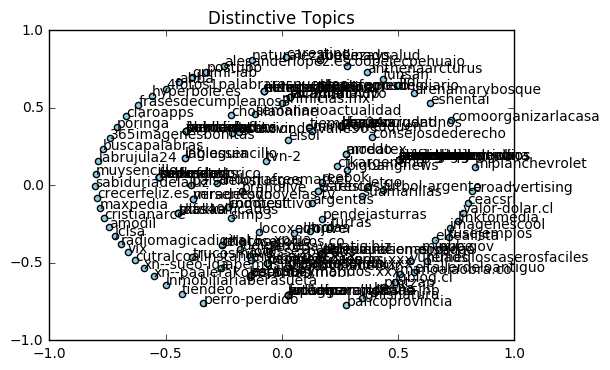

In [287]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

dist = 1 - cosine_similarity(dtm)
mds = MDS(n_components=2, dissimilarity="precomputed")
pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
names1 = [os.path.basename(fn).replace(('.txt'), '') for fn in filenames]
names2 = [os.path.basename(fn).replace(('.com'), '') for fn in names1]
names3 = [os.path.basename(fn).replace(('.net'), '') for fn in names2]
names4 = [os.path.basename(fn).replace(('.org'), '') for fn in names3]
names5 = [os.path.basename(fn).replace(('.ar'), '') for fn in names4]
names = [os.path.basename(fn).replace(('.ar'), '') for fn in names5]

for x, y, name in zip(xs, ys, names):
    color = 'orange' if "video" in name else 'skyblue'
    plt.scatter(x, y, c=color)
    plt.text(x, y, name)

plt.title("Distinctive Topics")

In [288]:
#MALLET

In [289]:
#Topic modeling with MALLET
import os
CORPUS_PATH = os.path.join('data','output/es')
filenames = sorted([os.path.join(CORPUS_PATH, fn) for fn in os.listdir(CORPUS_PATH)])

In [290]:
# Archivos están ubicados en data
len(filenames)  
filenames[:5]

['data\\output/es\\365imagenesbonitas.com.txt',
 'data\\output/es\\4fotos1palabrarespuestas.net.txt',
 'data\\output/es\\abc.gov.ar.txt',
 'data\\output/es\\adnriver.com.txt',
 'data\\output/es\\ahba.com.ar.txt']

In [309]:
# alternatively: wget http://mallet.cs.umass.edu/dist/mallet-2.0.7.tar.gz
#curl --remote-name http://mallet.cs.umass.edu/dist/mallet-2.0.7.tar.gz
#tar zxf mallet-2.0.7.tar.gz
#Ejecutar en consola, el output es la entrada del anterio análisis
#cd mallet-2.0.7/
#entrada
#./bin/mallet import-dir --input ../output/es/ --output ../output-mallet/topic-input-output-es.mallet --keep-sequence --remove-stopwords
#salida
#./bin/mallet train-topics --input ../output-mallet/topic-input-output-es.mallet --num-topics 20 --output-doc-topics ../output-mallet/doc-topics-output-es.txt --output-topic-keys ../output-mallet/topic-keys-output-es.txt --random-seed 1
import numpy as np
import itertools
import operator
import os

def grouper(n, iterable, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    args = [iter (iterable)] * n
    print(args)
    return itertools.izip_longest(*args, fillvalue=fillvalue)

doctopic_triples = []
mallet_docnames = []
doc = []
docnames = []

with open ("data/output-mallet/doc-topics-output-es.txt") as f:
    f.readline()
    for line in f:
        doc = line.rstrip().split('\t')
        protocolo, separador, docnames = doc[1].partition("es/") 
        mallet_docnames.append(docnames)
        for topic, share in grouper(2, doc[2]):
            triple = (docnames, int(topic), share)
            doctopic_triples.append(triple)
        
for m in mallet_docnames: 
    print m

[<iterator object at 0x0000000025041FD0>, <iterator object at 0x0000000025041FD0>]
[<iterator object at 0x0000000029A3A630>, <iterator object at 0x0000000029A3A630>]
[<iterator object at 0x0000000025041FD0>, <iterator object at 0x0000000025041FD0>]
[<iterator object at 0x0000000029A3A710>, <iterator object at 0x0000000029A3A710>]
[<iterator object at 0x0000000025041FD0>, <iterator object at 0x0000000025041FD0>]
[<iterator object at 0x0000000029A3A6A0>, <iterator object at 0x0000000029A3A6A0>]
[<iterator object at 0x000000002A44CAC8>, <iterator object at 0x000000002A44CAC8>]
[<iterator object at 0x0000000029A3A6A0>, <iterator object at 0x0000000029A3A6A0>]
[<iterator object at 0x000000002A44CAC8>, <iterator object at 0x000000002A44CAC8>]
[<iterator object at 0x0000000029A3A7F0>, <iterator object at 0x0000000029A3A7F0>]
[<iterator object at 0x0000000026AB02B0>, <iterator object at 0x0000000026AB02B0>]
[<iterator object at 0x0000000029A3A7F0>, <iterator object at 0x0000000029A3A7F0>]
[<it

In [315]:
# sort the triples
# triple is (docname, topicnum, share) so sort(key=operator.itemgetter(0,1))
# sorts on (docname, topicnum) which is what we want
doctopic_triples = sorted(doctopic_triples, key=operator.itemgetter(0,1))

# sort the document names rather than relying on MALLET's ordering
mallet_docnames = sorted(mallet_docnames)

# collect into a document-term matrix
num_docs = len(mallet_docnames )
num_topics = len(doctopic_triples) // len(mallet_docnames)
# the following works because we know that the triples are in sequential order
doctopic = np.zeros((num_docs, num_topics))
for triple in doctopic_triples:
    docname, topic, share = triple
    row_num = mallet_docnames.index(docname)
    doctopic[row_num, topic] = share

IndexError: index 1 is out of bounds for axis 1 with size 1

In [316]:
# The following method is considerably faster. It uses the itertools library which is part of the Python standard library.
import itertools
import operator

doctopic = np.zeros((num_docs, num_topics))

for i, (doc_name, triples) in enumerate(itertools.groupby(doctopic_triples, key=operator.itemgetter(0))):
    doctopic[i, :] = np.array([share for _, _, share in triples])

In [295]:
doc_names = []

for fn in filenames:
    basename = os.path.basename(fn)
    name, ext = os.path.splitext(basename)
    name = name.rstrip('0123456789')
    doc_names.append(name)

# turn this into an array so we can use NumPy functions
doc_names = np.asarray(doc_names)
doctopic_orig = doctopic.copy()

# use method described in preprocessing section
num_groups = len(set(doc_names))
doctopic_grouped = np.zeros((num_groups, num_topics))

for i, name in enumerate(sorted(set(doc_names))):
    doctopic_grouped[i, :] = np.mean(doctopic[novel_names == name, :], axis=0)

doctopic = doctopic_grouped

In [296]:
#Inspecting the topic model
from sklearn.feature_extraction.text import CountVectorizer

CORPUS_PATH_UNSPLIT = os.path.join('data', 'output/es')
filenames = [os.path.join(CORPUS_PATH_UNSPLIT, fn) for fn in sorted(os.listdir(CORPUS_PATH_UNSPLIT))]
vectorizer = CountVectorizer(input='filename')
dtm = vectorizer.fit_transform(filenames)
dtm.shape

(165, 2049)

In [297]:
dtm.data.nbytes  # number of bytes dtm takes up
#dtm.toarray().data.nbytes  # number of bytes dtm as array takes up
doctopic_orig.shape
#doctopic_orig.data.nbytes  # number of bytes document-topic shares take up

(165L, 1L)

In [298]:
docs = sorted(set(doc_names))
print("Top topics in...")

for i in range(len(doctopic)):
    top_topics = np.argsort(doctopic[i,:])[::-1][0:3]
    top_topics_str = ' '.join(str(t) for t in top_topics)
    print("{}: {}".format(docs[i], top_topics_str))

Top topics in...
365imagenesbonitas.com: 0
4fotos1palabrarespuestas.net: 0
abc.gov.ar: 0
adnriver.com: 0
ahba.com.ar: 0
aldeaviral.com: 0
alesanderlopez.es: 0
amodil.com: 0
andorrafreemarket.com: 0
anthenaarcturus.com: 0
arandu.com.ar: 0
arenamarybosque.com.ar: 0
argentas.com.ar: 0
arredo.com.ar: 0
bancoprovincia.com.ar: 0
berissociudad.com.ar: 0
besha.com.ar: 0
bigbangnews.com: 0
brandlive.net: 0
buenosaires.gob.ar: 0
buscapalabras.com.ar: 0
carestino.com: 0
carlosdodorico.com: 0
cba24n.com.ar: 0
ceacsrl.com.ar: 0
cfkargentina.com: 0
chinchonfree.com: 0
chochox.com: 0
cholilaonline.com: 0
claroapps.com: 0
clinica-web.com.ar: 0
comocultivo.com: 0
comoorganizarlacasa.com: 0
consejosdederecho.com.ar: 0
coopelecpehuajo.com.ar: 0
crecerfeliz.es: 0
cristianarce.com.ar: 0
cutralcoalinstante.com: 0
deruedas.com.ar: 0
diariofemenino.com: 0
diariosargentinos.net: 0
eavescueladevinos.com: 0
elchubut.com.ar: 0
eldestapeweb.com: 0
elpatagonico.com: 0
elrealista.com: 0
elsol.com.ar: 0
eltallerdeloa

In [299]:
with open('data/output-mallet/topic-keys-output-es.txt') as input:
    topic_keys_lines = input.readlines()

topic_words = []

for line in topic_keys_lines:
    _, _, words = line.split('\t')  # tab-separated
    words = words.rstrip().split(' ')  # remove the trailing '\n'
    topic_words.append(words)

# now we can get a list of the top words for topic 0 with topic_words[0]
topic_words[0]

['foto',
 'compartir',
 'nuevo',
 'whatsapp',
 'tema',
 'instant',
 'adulto',
 'mayor',
 'auto',
 'contacto',
 'hace',
 'net',
 'mojada',
 'definicion',
 'vender',
 'actividad',
 'linea',
 'momento',
 'dia']

In [300]:
N_WORDS_DISPLAY = 10

for t in range(len(topic_words)):
    print("Topic {}: {}".format(t, ' '.join(topic_words[t][:N_WORDS_DISPLAY])))

Topic 0: foto compartir nuevo whatsapp tema instant adulto mayor auto contacto
Topic 1: mejor grati video porno sexo xxx chica jovencita follando mina
Topic 2: toda travesti telefono aca embarazo actualizado perro pagina chimento guarra
Topic 3: bueno madura escort acompanant san argentina rubro casera gran masaj
Topic 4: comunidad comprar fabrica puta ultimo publica acceso blog centro equipo
Topic 5: onlin internet zona tube receta realizado promocion movile universidad sistema
Topic 6: informacion historia ma proyecto onlin contacto calient publico institucion panama
Topic 7: compra gobierno periodismo musica mile app espana river pendeja sencillo
Topic 8: vida tiempo colectivo turra cine pronostico agencia ciudad traviesa rumor
Topic 9: ofici tienda clasificado empresa aplicacion ar facil encontrar costo precio
Topic 10: casa pagina ropa desnuda persona cosa descarga internacion articulo mar
Topic 11: web espanol air guia entretenimiento relacion mundo amor hogar gent
Topic 12: jueg

In [304]:
#Temas distintivos
noticia_indices, video_indices = [], []

for index, fn in enumerate(sorted(set(doc_names))):
    if "noticia" in fn:
        noticia_indices.append(index)
    elif "video" in fn:
        video_indices.append(index)

noticia = np.mean(doctopic[noticia_indices, :], axis=0)
video = np.mean(doctopic[video_indices, :], axis=0)
keyness = np.abs(noticia - video)
ranking = np.argsort(keyness)[::-1]  #from highest to lowest; [::-1] reverses order in Python sequences

# distinctive topics:
ranking[:10]

C:\Users\maite.echeverry\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in absolute


array([0], dtype=int64)

In [305]:
#Visualización
#cd mallet-2.0.7
#./bin/mallet import-dir --input ../output/es/ --output ../output-mallet/topic-input.mallet --keep-sequence --remove-stopwords
#./bin/mallet train-topics --input ../output-mallet/topic-input.mallet --num-topics 5 --output-doc-topics ../output-mallet/doc-topics.txt --output-topic-keys ../output-mallet/topic-keys.txt --word-topic-counts-file ../output-mallet/word-topic.txt

In [306]:
doctopic.shape

(165L, 1L)

In [307]:
print(doctopic)

[[  6.]
 [  8.]
 [  4.]
 [  3.]
 [  1.]
 [  5.]
 [  0.]
 [  6.]
 [  8.]
 [  8.]
 [  7.]
 [  3.]
 [ nan]
 [  0.]
 [  3.]
 [  3.]
 [  8.]
 [ nan]
 [ nan]
 [  9.]
 [  6.]
 [  5.]
 [ nan]
 [  3.]
 [  9.]
 [  9.]
 [  0.]
 [  1.]
 [  3.]
 [ nan]
 [  1.]
 [  1.]
 [  5.]
 [  8.]
 [  5.]
 [  5.]
 [  0.]
 [ nan]
 [ nan]
 [  1.]
 [  7.]
 [  7.]
 [  7.]
 [  8.]
 [  7.]
 [  9.]
 [  3.]
 [  7.]
 [  6.]
 [ nan]
 [  1.]
 [ nan]
 [  3.]
 [ nan]
 [  5.]
 [  9.]
 [ nan]
 [  4.]
 [ nan]
 [  7.]
 [  4.]
 [  0.]
 [  8.]
 [ nan]
 [  2.]
 [ nan]
 [  2.]
 [ nan]
 [ nan]
 [  7.]
 [  5.]
 [ nan]
 [ nan]
 [  1.]
 [ nan]
 [  4.]
 [  7.]
 [  3.]
 [  4.]
 [  3.]
 [ nan]
 [ nan]
 [ nan]
 [  9.]
 [  1.]
 [ nan]
 [  2.]
 [  9.]
 [  8.]
 [  3.]
 [ nan]
 [ nan]
 [  6.]
 [  1.]
 [  3.]
 [  3.]
 [ nan]
 [  0.]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [  6.]
 [  1.]
 [ nan]
 [  7.]
 [  3.]
 [  6.]
 [  4.]
 [ nan]
 [ nan]
 [ nan]
 [ nan]
 [  1.]
 [ nan]
 [ nan]
 [  3.]
 [ nan]
 [  2.]
 [  2.]
 [ nan]
 [ nan]
 [ nan]
 [  8.]
 [  7.]


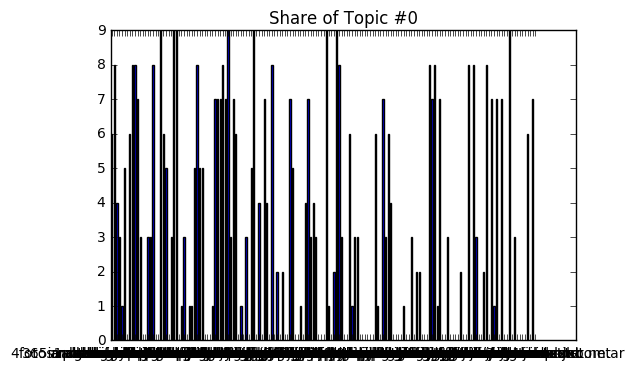

In [308]:
%matplotlib inline
import matplotlib.pyplot as plt

N, K = doctopic.shape
ind = np.arange(N)  # points on the x-axis

width = 0.5

plt.bar(ind, doctopic[:,0], width=width)
plt.xticks(ind + width/2, docs )  # put labels in the center

plt.title('Share of Topic #0')